# Local Search Implementation on Diagonal Magic Cube
## Made by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [1]:
from tensor import *

from simulated import *
from hill_climb import *
from random_restart import *


import numpy as np

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [2]:
goal_state = [

# Level 1
[
    [33, 22, 113, 42, 105],
    [2, 89, 106, 19, 99],
    [85, 82, 4, 119, 25],
    [98, 90, 6, 112, 9],
    [97, 32, 86, 23, 77]
],
# Level 2
[
    [95, 80, 111, 11, 18],
    [91, 55, 65, 69, 35],
    [16, 66, 70, 53, 110],
    [5, 68, 54, 67, 121],
    [108, 46, 15, 115, 31]
],
# Level 3
[
    [100, 17, 48, 34, 116],
    [114, 75, 52, 62, 12],
    [83, 50, 63, 76, 43],
    [8, 64, 74, 51, 118],
    [10, 109, 78, 92, 26]
],
# Level 4
[
    [38, 102, 3, 125, 47],
    [81, 59, 72, 58, 45],
    [30, 73, 56, 60, 96],
    [87, 57, 61, 71, 39],
    [79, 24, 123, 1, 88]
],
# Level 5
[
    [49, 94, 40, 103, 29],
    [27, 37, 20, 107, 124],
    [101, 44, 122, 7, 41],
    [117, 36, 120, 14, 28],
    [21, 104, 13, 84, 93]
]
]

In [3]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [4]:
obj_func_goal = goal_cube.objective_function()
print(f"goal cube objective function value: {obj_func_goal}")

goal cube objective function value: 872717.0


### Problem Cube Initialization

In [5]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

In [6]:
cube.same_tensor(cube)

True

In [7]:
# cube.plot_cube()

In [8]:
cube.print_tensor()

Level: 1

[78 40 11 34 31]
[ 91 119 103 107 104]
[ 69  48 117  53  26]
[122   7  32  90  10]
[ 9 64 98 25 58]

Level: 2

[89 52 65 80 61]
[ 4 24 79 82 92]
[110 106  39  75   8]
[ 70 102  63  46  38]
[59 83 56 36 93]

Level: 3

[23 76 29 12 45]
[77 30 22 18 95]
[ 44 112  19  51  68]
[101 121   3  15  87]
[16 37 74 88  6]

Level: 4

[ 33  99  66 111 115]
[  1  20  13 118  85]
[113  42  71  47   2]
[ 21 100  17 125  55]
[ 62 123  54  35 116]

Level: 5

[ 84  49  67  86 109]
[ 5 28 43 94 41]
[ 27  57 108  81 105]
[ 73  50 124  97  60]
[ 14  96 120 114  72]



In [9]:
# cube.plot_per_level()

In [10]:
obj_func = cube.objective_function()
print(f"cube's objective function: {obj_func}")

cube's objective function: 1294708.0


## Local Seach Implementation

### Random Restart Hill-Climbing


In [16]:
print(f"ideal objective function {obj_func_goal}")

ideal objective function 872717.0


In [17]:
RR = Random_restart(cube=cube)

Initial Value: 1294708.0

Restart: 1

Initial Value: 1294708.0

Step 1: Choosen Neighbor Value: 964085.0; Best Value: 1294708.0
Step 2: Choosen Neighbor Value: 921181.0; Best Value: 964085.0
Iteration Value: 921181.0

Best Value: 921181.0

Restart: 2

Initial Value: 1294708.0

Step 1: Choosen Neighbor Value: 1039877.0; Best Value: 1294708.0
Step 2: Choosen Neighbor Value: 991502.0; Best Value: 1039877.0
Step 3: Choosen Neighbor Value: 845450.0; Best Value: 991502.0
Iteration Value: 845450.0

Best Value: 845450.0

Restart: 3

Initial Value: 1294708.0

Step 1: Choosen Neighbor Value: 1206639.0; Best Value: 1294708.0
Step 2: Choosen Neighbor Value: 1049005.0; Best Value: 1206639.0
Step 3: Choosen Neighbor Value: 1036573.0; Best Value: 1049005.0
Step 4: Choosen Neighbor Value: 1022167.0; Best Value: 1036573.0
Iteration Value: 1022167.0

Best Value: 845450.0

Restart: 4

Initial Value: 1294708.0

Step 1: Choosen Neighbor Value: 1198804.0; Best Value: 1294708.0
Step 2: Choosen Neighbor Value

In [18]:
RR.results()

+------------------------ RESULTS -------------------------+

    Best iteration: 78

  final Value: 813205.000000

+-------------------------- END ---------------------------+


In [19]:
print(f"Random Restart Best Value: {RR.best_value}\n")
print(f"Ideal Value: {obj_func_goal}\n")
print(f"differences from ideal: {RR.best_value - obj_func_goal}")

Random Restart Best Value: 813205.0

Ideal Value: 872717.0

differences from ideal: -59512.0


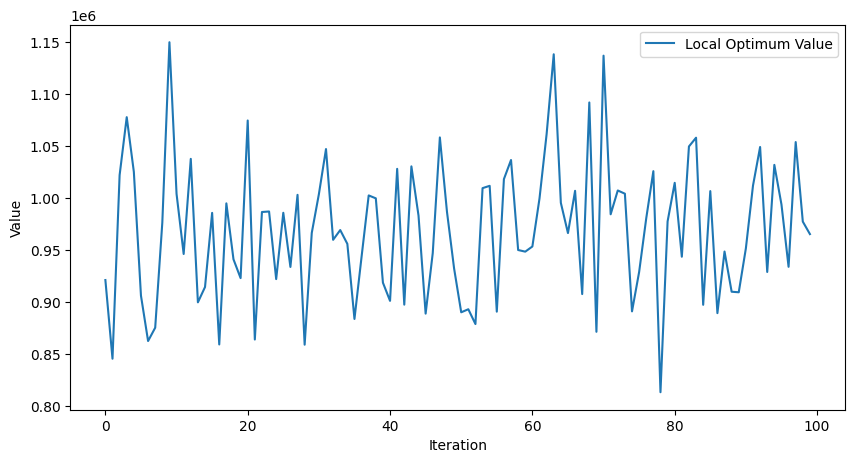

In [20]:
RR.hist_plot()

### Simulated Annealing

In [21]:
print(f"ideal objective function {goal_cube.objective_function()}")

ideal objective function 872717.0


In [22]:
SA = Simulated(cube=cube,tmax=100,step_max=7500,cooling_schedule="quadratic",alpha=0.999)

Initial Energy: 1294708.0

Step:1, Energy: 1294398.0, Best Energy: 1294708.0,Temperature: 100

Random Number: 0.9164212170180347; Acceptance Probability: 1

Step:2, Energy: 1219638.0, Best Energy: 1294398.0,Temperature: 50.02501250625313

Random Number: 0.26362108028411335; Acceptance Probability: 1

Step:3, Energy: 1199498.0, Best Energy: 1219638.0,Temperature: 20.016012810248196

Random Number: 0.23640681476552272; Acceptance Probability: 1

Step:4, Energy: 1180073.0, Best Energy: 1199498.0,Temperature: 10.009008107296568

Random Number: 0.9113200922168592; Acceptance Probability: 1

Step:5, Energy: 1190513.0, Best Energy: 1180073.0,Temperature: 5.887894488930757

Random Number: 0.6707252232211014; Acceptance Probability: 0.0

Step:6, Energy: 1196057.0, Best Energy: 1180073.0,Temperature: 3.849855630413859

Random Number: 0.8888700484647021; Acceptance Probability: 0.0

Step:7, Energy: 1181657.0, Best Energy: 1180073.0,Temperature: 2.7053349204631534

Random Number: 0.553216529410473

In [23]:
SA.results()

+------------------------ RESULTS -------------------------+

cooling sched.: quadratic multiplicative
  initial temp: 100
    final temp: 1.7795573034446481e-06
    final step: 7501

  final energy: 894319.000000

+-------------------------- END ---------------------------+


In [24]:
print(f"differences from ideal: {SA.best_energy - obj_func_goal}")

differences from ideal: 21602.0


In [25]:
SA.best_energy

894319.0

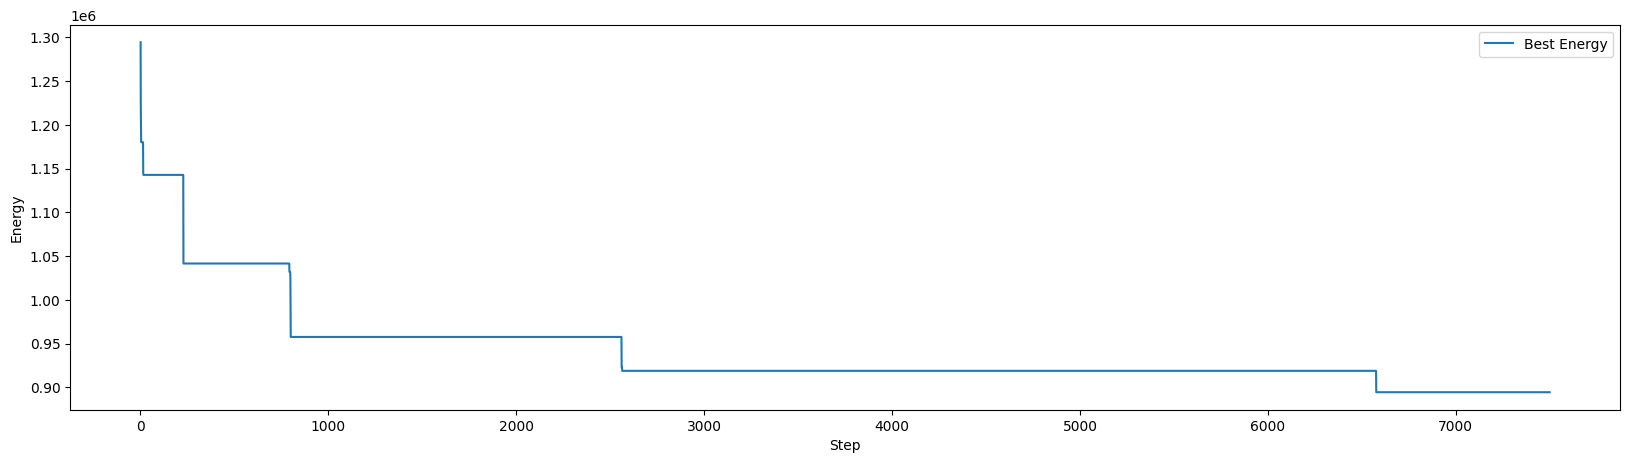

In [26]:
SA.hist_plot()

### Genetic Algorithm
